[View in Colaboratory](https://colab.research.google.com/github/rdenadai/dsp_study_notebooks/blob/master/notebooks/dsp101b.ipynb)

## DSP 101b

Experiments on Digital Signal Processing, ranging from random generated signals, voice and images!

In these experiments, we are not analysing signals in the range of DSP but also with an statistical view...

To build this document we use a lot of resources, here are some of the most important.
- References:
 - [DSP Guide](http://www.dspguide.com)
 - [DSP Tutorial](https://www.tutorialspoint.com/digital_signal_processing/index.htm)
 - [Plotly FFT Filters](https://plot.ly/python/fft-filters/)
 - [Digital Signal Processing {youtube}](https://www.youtube.com/playlist?list=PLuh62Q4Sv7BUSzx5Jr8Wrxxn-U10qG1et)
 - [Signal Processing 101 {youtube}](https://www.youtube.com/watch?v=KZd68xgasIU&list=PLJ-OcUCIty7evBmHvYRv66RcuziszpSFB)
 - [All Signal Processing {youtube}](https://www.youtube.com/user/allsignalprocessing/playlists)

In [0]:
import math
import random
import numpy as np
import pandas as pd
from scipy.stats import norm
from scipy.signal import resample
from scipy import interpolate
from scipy import signal
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from mpl_toolkits.axes_grid1 import ImageGrid
from IPython.display import Audio

%matplotlib inline

def normalization(x, m=255):
    return (((x - min(x)) / (max(x) - min(x))) * m).astype('int64')

def normalization2(x, a, b):
    return (a + (((x - min(x)) * (b - a)) / (max(x) - min(x)))).astype('float64')

In [0]:
def sine(A=4096, f=1, t=1, Fs=1024, phi=0):
    # A = 4096              # amplitude (deslocamento vertical)
    # phi = 0               # fase (deslocamento horizontal)
    # f = 1                 # frequencia em hz (quantas oscilações em 1 segundo)
    # t = 1                 # tempo em segundos
    # Fs = 200              # frequencia de amostragem (pontos por segundo)
    n = np.arange(Fs * t)
    return (A * np.sin((((2 * np.pi * f) * n) / Fs) + phi)).astype('int64')

def resamp_presenter(x, num):
    y = np.zeros(x.size)
    y[y==0] = np.nan
    y[::num] = x[::num]
    return y, math.ceil(len(x) / num)

def resamp(x, num):
    return x[::num]

### LTI Systems (Linear Time-Invariant)

 > *"It investigates the response of a linear and time-invariant system to an arbitrary input signal."*  **[wiki](https://en.wikipedia.org/wiki/Linear_time-invariant_theory)**
 
 #### Homogeneity:
 
 $x(t)   => LTI => y(t)$
 
 $kx(t) => LTI => ky(t), k \in \mathbb{R}$
 
 **Proof:**
 
 Given a LTI system with impulse response h[n] been [1, 0, 1, 0] we can prove the homogeneity by multiplying the signal by a k factor.

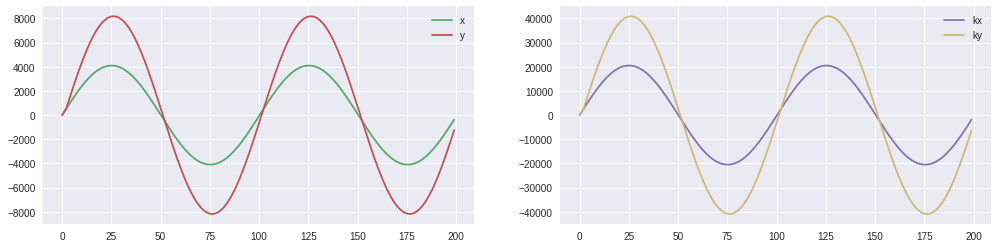

y    = Min / Max:  -8175     /  8175
ky   = Min / Max:  -40875.0  /  40875.0
ky/k = Min / Max:  -8175.0   /  8175.0
--------------------
Are equals? Sum of the difference:  0.0


In [3]:
t=5

# h represents the impulse response of a LTI system
h = np.array(np.tile([1, 0], 2))

# since we are in time domain, we use the convolution
x = sine(f=440, t=t, Fs=44100)
y = np.convolve(x, h)

k = 5.  # k is a simple constant to check linearity
kx = k * x
ky = np.convolve(kx, h)

# showdown
fig = plt.figure(6, figsize=(17, 4))
plt.subplot(121)
plt.plot(x[:200], label='x', color='C1')
plt.plot(y[:200], label='y', color='C2')
plt.legend()
plt.subplot(122)
plt.plot(kx[:200], label='kx', color='C3')
plt.plot(ky[:200], label='ky', color='C4')
plt.legend()
plt.show()

print('y    = Min / Max: ', np.min(y), '    / ', np.max(y))
print('ky   = Min / Max: ', np.min(ky), ' / ', np.max(ky))
print('ky/k = Min / Max: ', np.min(ky/k), '  / ', np.max(ky/k))
print('-' * 20)
print('Are equals? Sum of the difference: ', np.sum(y - (ky/k)))

#### Additivity


$x_1(t) => LTI => y_1(t)$

$x_2(t) => LTI => y_2(t)$

$x_1(t) + x_2(t) => LTI => y_1(t) + y_2(t)$

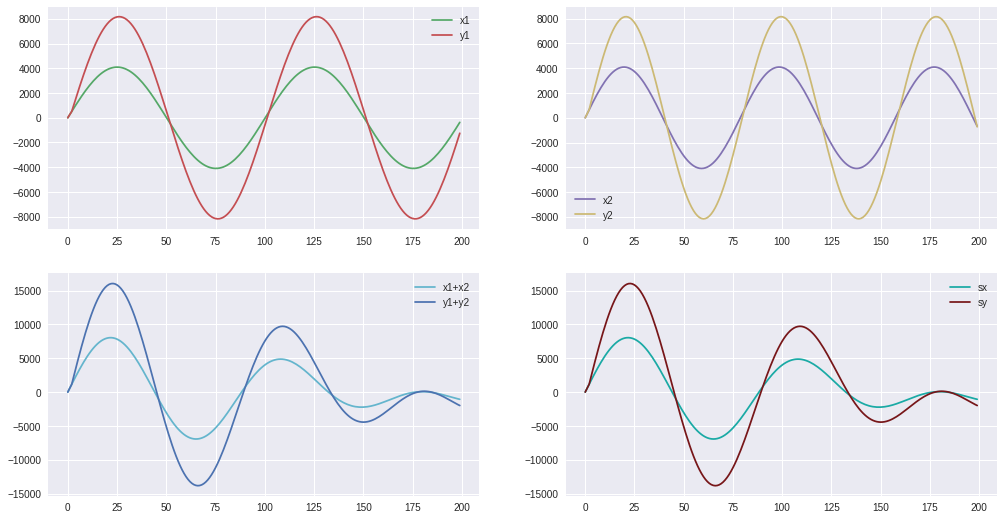

In [4]:
# since we are in time domain, we use the convolution
x1 = sine(f=440, t=t, Fs=44100)
y1 = np.convolve(x1, h)

x2 = sine(f=560, t=t, Fs=44100)
y2 = np.convolve(x2, h)

sx = x1 + x2
sy = np.convolve(sx, h)

# showdown
fig = plt.figure(6, figsize=(17, 9))
plt.subplot(221)
plt.plot(x1[:200], label='x1', color='C1')
plt.plot(y1[:200], label='y1', color='C2')
plt.legend()
plt.subplot(222)
plt.plot(x2[:200], label='x2', color='C3')
plt.plot(y2[:200], label='y2', color='C4')
plt.legend()
plt.subplot(223)
plt.plot((x1+x2)[:200], label='x1+x2', color='C5')
plt.plot((y1+y2)[:200], label='y1+y2', color='C6')
plt.legend()
plt.subplot(224)
plt.plot(sx[:200], label='sx', color='#1aaaa5')
plt.plot(sy[:200], label='sy', color='#771619')
plt.legend()
plt.show()

#### Shift-Invariance

$x(t + s) => LTI => y(t + s)$

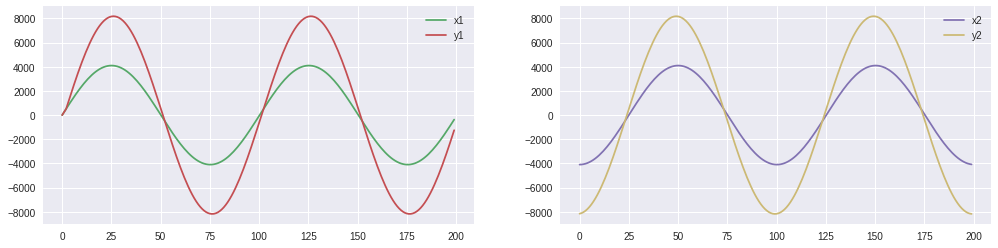

In [5]:
s = 25

# since we are in time domain, we use the convolution
x1 = sine(f=440, t=t, Fs=44100)
y1 = np.convolve(x1, h)

x2 = np.roll(sine(f=440, t=t, Fs=44100), s)
y2 = np.convolve(x2, h)

# showdown
fig = plt.figure(6, figsize=(17, 4))
plt.subplot(121)
plt.plot(x1[:200], label='x1', color='C1')
plt.plot(y1[:200], label='y1', color='C2')
plt.legend()
plt.subplot(122)
plt.plot(x2[:200], label='x2', color='C3')
plt.plot(y2[2:202], label='y2', color='C4')
plt.legend()
plt.show()

## Convolution

> "*In mathematics (and, in particular, functional analysis) convolution is a mathematical operation on two functions (f and g) to produce a third function, that is typically viewed as a modified version of one of the original functions, giving the integral of the pointwise multiplication of the two functions as a function of the amount that one of the original functions is translated*" **[wiki](https://en.wikipedia.org/wiki/Convolution)**


**Impulse response** represents the response of a system when a delta function is the input of the system.

A **delta function** is a signal that only has value of one in the zero position, it's represented in terms of *continuos signal* as **[Dirac Delta](https://en.wikipedia.org/wiki/Dirac_delta_function)**.

$\delta[n] => LTI => h[n]$

As a mathematical operation **convolution** is representated with the star signal ***** such as:

$y[n] = x[n] * h[n]$

**Convolution sum** in mathematical terms is given by the following formula:

$y[n] = \sum_{k=0}^{M-1}h[k] * x[n-k]$

Important to note that if the system is considered a **filter**, the impulse response is called *filter kernel*, or simply a *kernel*.

### Simple mathematical example:

IF *K*=5 and *D*=3, then:

$P = K + D - 1$

$P = 5 + 3 - 1 \Rightarrow P = 7$


Convolution example *K*=2 e *D*=3:

$y[0] = x[0] \times h[0]$

$y[1] = x[0] \times h[1] + x[1] \times h[0]$

$y[2] = x[0] \times h[2] + x[1] \times h[1] + x[2] \times h[0]$

$y[3] = x[1] \times h[2] + x[2] \times h[1] + x[3] \times h[0]$


### Example:

As an example lets build a simple signal and use both a low and high pass filter with blackman window showing each of the signals summed together.

The final signal is the sum of a sinusoidal wave and a slowing rising ramp. The low pass filter will try to represent the rising ramp, showing low frequencies, the high pass filter will retrieve the high frequency.

We are using the **[Blackman Window function](https://en.wikipedia.org/wiki/Window_function)** to build the filter kernel.

**Blackman Window** defined as:

$w(n) = a_0 - a_1\cos(\frac{2\pi n}{N-1}) + a_2\cos(\frac{4\pi n}{N-1})$

 > *By common convention, the unqualified term Blackman window refers to Blackman's "not very serious proposal" of α = 0.16 (a0 = 0.42, a1 = 0.5, a2 = 0.08), which closely approximates the "exact Blackman", with a0 = 7938/18608 ≈ 0.42659, a1 = 9240/18608 ≈ 0.49656, and a2 = 1430/18608 ≈ 0.076849.*
 
This means $a_0 = 0.42$, $a_1 = 0.5$ and $a_2 = 0.08$ as exposed inside the lower pass filter function bellow.

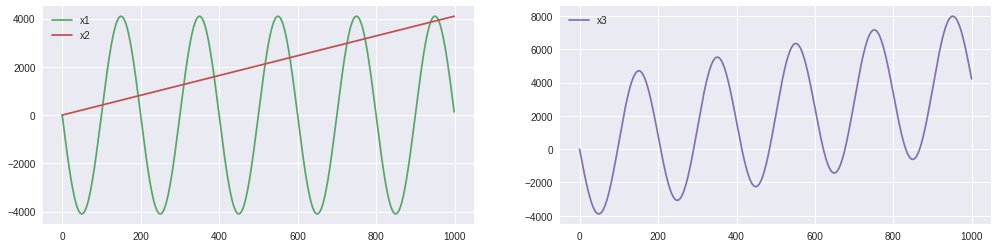

In [6]:
x1 = np.roll(sine(f=5, t=1, Fs=1000), 100)
x2 = np.linspace(0, 4096, 1000)
x3 = x1 + x2

fig = plt.figure(6, figsize=(17, 4))
plt.subplot(121)
plt.plot(x1, label='x1', color='C1')
plt.plot(x2, label='x2', color='C2')
plt.legend()
plt.subplot(122)
plt.plot(x3, label='x3', color='C3')
plt.legend()
plt.show()

** ( a ) ** This is the use of a **low pass filter** and the result of using this filter is represented in the last graph that retrieve a somehow rising ramp.

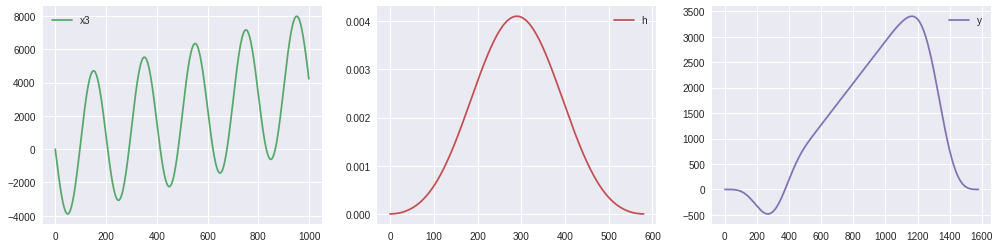

In [7]:
def low_pass_filter(fc=.00001, b=.0069):
    N = int(np.ceil((4 / b)))
    if not N % 2: N += 1
    n = np.arange(N)

    h = np.sinc(2 * fc * (n - (N - 1) / 2.))
    window = 0.42 - 0.5 * np.cos(2 * np.pi * n / (N - 1)) + 0.08 * np.cos(4 * np.pi * n / (N - 1))
    h = h * window
    return h / np.sum(h)

h = low_pass_filter() # filter
y = np.convolve(x3, h) # convolution

fig = plt.figure(6, figsize=(17, 4))
plt.subplot(131)
plt.plot(x3, label='x3', color='C1')
plt.legend()
plt.subplot(132)
plt.plot(h, label='h', color='C2')
plt.legend()
plt.subplot(133)
plt.plot(y, label='y', color='C3')
plt.legend()
plt.show()

**( b )** As said above applying the **high pass filter** returns the high frequency, which in this case is the sinusoidal wave.

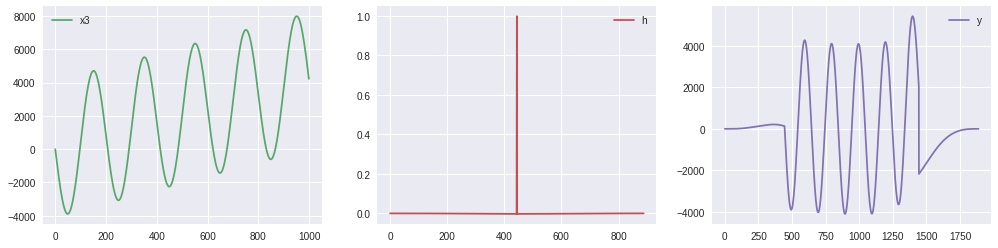

In [8]:
def high_pass_filter(fc=.00001, b=.0045):
    N = int(np.ceil((4 / b)))
    if not N % 2: N += 1
    n = np.arange(N)

    h = np.sinc(2 * fc * (n - (N - 1) / 2.))
    window = np.blackman(N)
    h = h * window
    h = h / np.sum(h)

    # reverse function
    h = -h
    h[int((N - 1) / 2)] += 1
    return h

h = high_pass_filter() # filter
y = np.convolve(x3, h) # convolution

fig = plt.figure(6, figsize=(17, 4))
plt.subplot(131)
plt.plot(x3, label='x3', color='C1')
plt.legend()
plt.subplot(132)
plt.plot(h, label='h', color='C2')
plt.legend()
plt.subplot(133)
plt.plot(y, label='y', color='C3')
plt.legend()
plt.show()

### Commutative

Convolution is a commutative operation, this means that:

$ f * g = g * f$


### Associativity

$f * ( g * h ) = ( f * g ) * h$


### Distributivity

$ f * ( g + h ) = (f * g) + (f * h)$

### Associativity with scalar multiplication

$ a  ( f * g ) = (a  f) * g$


### Multiplicative identity

$f * \delta = f$

Diff equals : sum(y - y2) :  0
Diff equals : sum(y2 - y) :  0


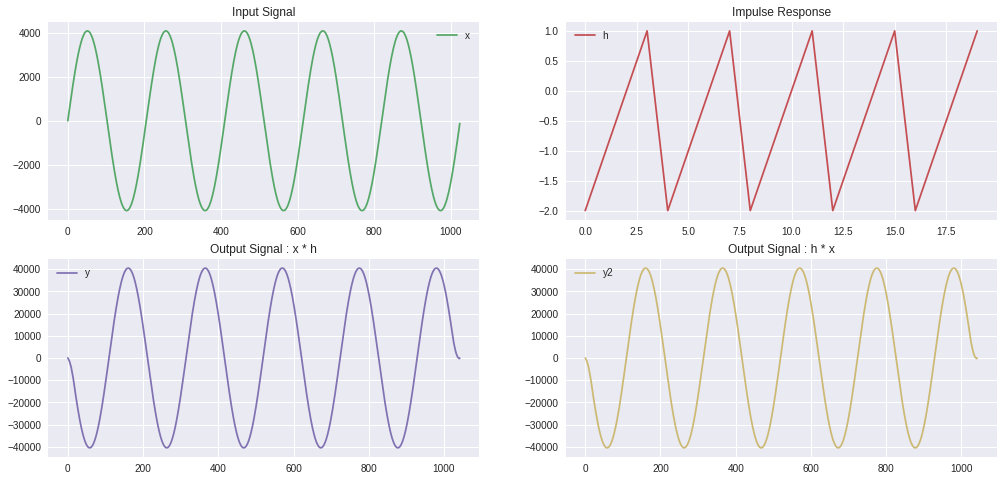

In [9]:
x = sine(f=5, t=1)
h = np.array(np.tile([-2, -1, 0, 1], 5))
y = np.convolve(x, h)
y2 = np.convolve(h, x)

print('Diff equals : sum(y - y2) : ', sum(y - y2))
print('Diff equals : sum(y2 - y) : ', sum(y2 - y))

fig = plt.figure(6, figsize=(17, 8))
plt.subplot(221)
plt.title('Input Signal')
plt.plot(x, label='x', color='C1')
plt.legend()
plt.subplot(222)
plt.title('Impulse Response')
plt.plot(h, label='h', color='C2')
plt.legend()
plt.subplot(223)
plt.title('Output Signal : x * h')
plt.plot(y, label='y', color='C3')
plt.legend()
plt.subplot(224)
plt.title('Output Signal : h * x')
plt.plot(y2, label='y2', color='C4')
plt.legend()
plt.show()

### Convolution Properties

#### Delta function

Could be identified as the *identity* of convolution, the convolution of a signal with the delta function gives as result the same signal.

$x[n] * \delta [n] = x[n]$

Diff equals : sum(x - y) :  0.0


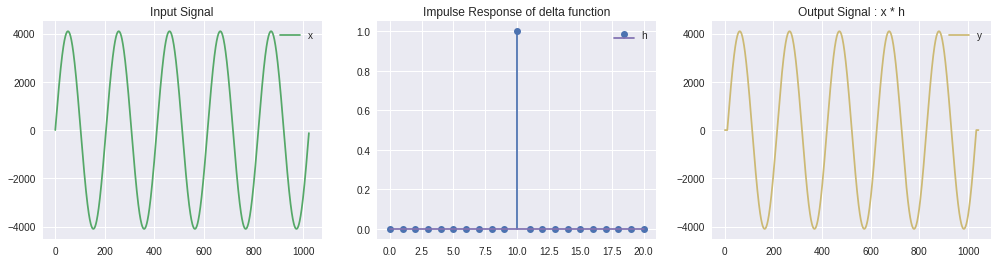

In [10]:
x = sine(f=5, t=1)

d = np.zeros(21)
mi = int(np.floor(len(d)/2))
d[mi] = 1

y = np.convolve(x, d)
y2 = y[10:1034] # remove the zeros add to begging and enf of signal (padding)

print('Diff equals : sum(x - y) : ', sum(x - y2))

fig = plt.figure(6, figsize=(17, 4))
plt.subplot(131)
plt.title('Input Signal')
plt.plot(x, label='x', color='C1')
plt.legend()
plt.subplot(132)
plt.title('Impulse Response of delta function')
plt.stem(d, label='h', color='C2')
plt.legend()
plt.subplot(133)
plt.title('Output Signal : x * h')
plt.plot(y, label='y', color='C4')
plt.legend()
plt.show()

#### Amplifier or Attenuator

Using the concept seen above regard the delta function, one could create the concept of amplifier or attenuator depending on the change in amplitude of the delta function value.

$x[n] * k \delta [n] = k x[n]$

Amplitude: 
--------------------
Input Signal            :  8191
Output Signal Amplifier :  81910
Output Signal Attenuator:  819


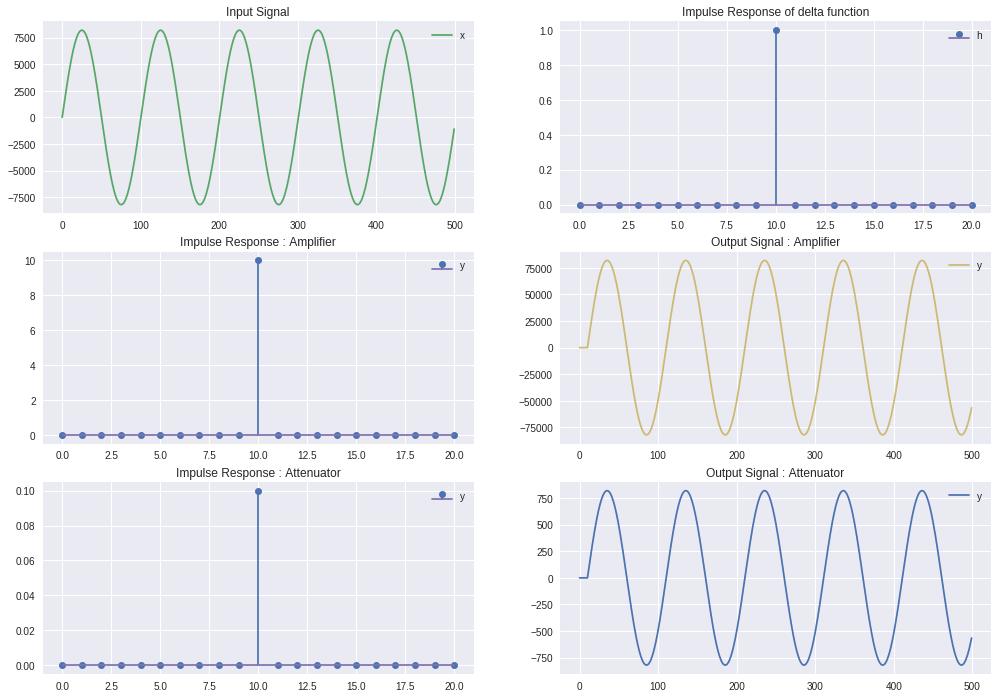

In [18]:
N = 500

x = sine(A=8192, f=440, t=2, Fs=44100) # input sinusoid wave

delta = np.zeros(21) # detal
delta[10] = 1

k_amp = 10 # amplify by a factor of x10
k_att = .1 # attenuate by a factor of x10

amplifier = np.zeros(21)
attenuator = np.zeros(21)
amplifier[10] = 1 * k_amp
attenuator[10] = 1 * k_att

y_amp = np.convolve(x, amplifier)
y_att = np.convolve(x, attenuator)

print('Amplitude: ')
print('-' * 20)
print('Input Signal            : ', int(np.max(x)))
print('Output Signal Amplifier : ', int(np.max(y_amp)))
print('Output Signal Attenuator: ', int(np.max(y_att)))

fig = plt.figure(6, figsize=(17, 12))
plt.subplot(321)
plt.title('Input Signal')
plt.plot(x[:N], label='x', color='C1')
plt.legend()
plt.subplot(322)
plt.title('Impulse Response of delta function')
plt.stem(delta, label='h', color='C2')
plt.legend()
plt.subplot(323)
plt.title('Impulse Response : Amplifier')
plt.stem(amplifier, label='y', color='C3')
plt.legend()
plt.subplot(324)
plt.title('Output Signal : Amplifier')
plt.plot(y_amp[:N], label='y', color='C4')
plt.legend()
plt.subplot(325)
plt.title('Impulse Response : Attenuator')
plt.stem(attenuator, label='y', color='C5')
plt.legend()
plt.subplot(326)
plt.title('Output Signal : Attenuator')
plt.plot(y_att[:N], label='y', color='C6')
plt.legend()
plt.show()

Let's join the 3 soundwaves build above to see what an Amplifier and Attenuator will do to the amplitude.

As you can hear, changes in amplitude, change the way we hear the volume of the sound.

In [19]:
# print(len(y_att))
# print(len(x))
# print(len(y_amp))

m = np.zeros(len(y_att) + len(x) + len(y_amp))
m[:88220] = y_att
m[88220:176420] = x
m[176420:] = y_amp
Audio(m, rate=44100)

#### Shift

This could be described as signal delay or advance, depending on the direction of the shift.

$x[n] * \delta [n + s] = x[n + s]$

**Example:** Let's delay a signal by 3 samples.


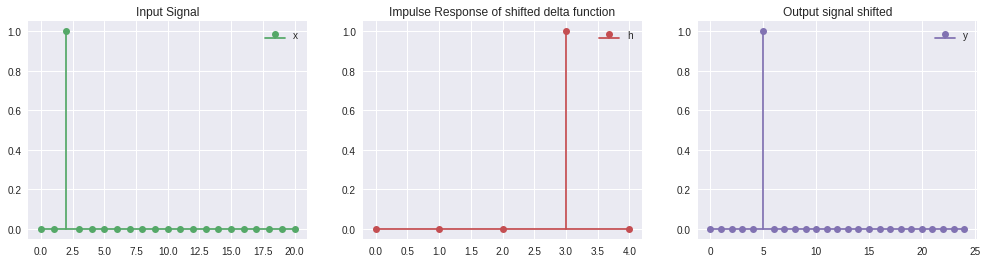

In [13]:
x = np.zeros(21)
x[2] = 1

delta = np.zeros(5)
delta[3] = 1

y = np.convolve(x, delta)

fig = plt.figure(6, figsize=(17, 4))
plt.subplot(131)
plt.title('Input Signal')
plt.stem(x, label='x', linefmt='C1', markerfmt='C1o', basefmt='C1')
plt.legend()
plt.subplot(132)
plt.title('Impulse Response of shifted delta function')
plt.stem(delta, label='h', linefmt='C2', markerfmt='C2o', basefmt='C2')
plt.legend()
plt.subplot(133)
plt.title('Output signal shifted')
plt.stem(y, label='y', linefmt='C3', markerfmt='C3o', basefmt='C3')
plt.legend()
plt.show()

### Causal and Noncausal Signals

 > ""*In control theory, a causal system (also known as a physical or nonanticipative system) is a system where the output depends on past and current inputs but not future inputs.*"" [wiki](https://en.wikipedia.org/wiki/Causal_system)
 
 Causal :  $ y(t) = x(t)  $
 
 Causal : $ y(t) = x(t-1) $
 
 Noncausal : $ y(t) = x(t) + x(t + 1) $

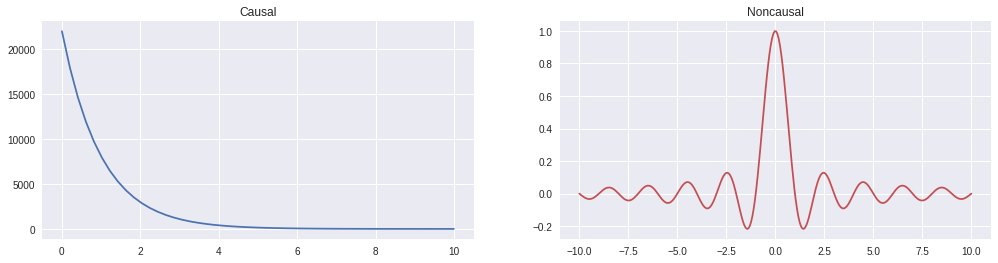

In [14]:
sinc = np.sinc(np.linspace(-10, 10, 300))
exp = np.array([np.exp(m) for m in reversed(np.linspace(0, 10, 50))])

fig = plt.figure(6, figsize=(17, 4))
plt.subplot(121)
plt.title('Causal')
plt.plot(np.linspace(0, 10, 50), exp)
plt.subplot(122)
plt.title('Noncausal')
plt.plot(np.linspace(-10, 10, 300), sinc, color='C2')

plt.show()

### Zero Phase, Linear Phase, and Nonlinear Phase
 > *A signal is said to be zero phase if it has left-right symmetry around sample number zero. A signal is said to be linear phase if it has left-right symmetry, but around some point other than zero. This means that any linear phase signal can be changed into a zero phase signal simply by shifting left or right. Lastly, a signal is said to be nonlinear phase if it does not have left-right symmetry.* [dspguide.com](http://www.dspguide.com/ch7/1.htm)

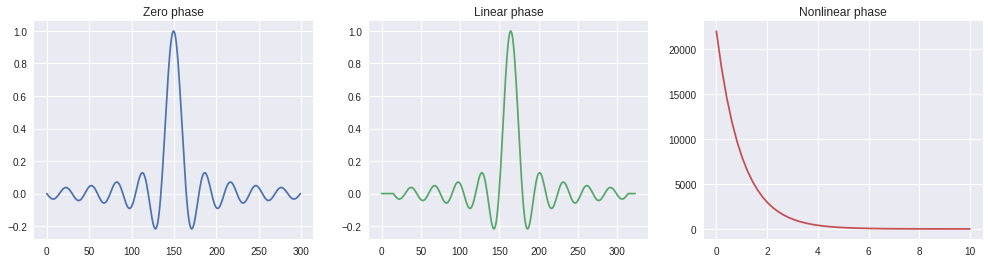

In [15]:
sinc = np.sinc(np.linspace(-10, 10, 300))

delta = np.zeros(25)
delta[15] = 1

sinc_shifted = np.convolve(sinc, delta)

exp = np.array([np.exp(m) for m in reversed(np.linspace(0, 10, 50))])

fig = plt.figure(6, figsize=(17, 4))
plt.subplot(131)
plt.title('Zero phase')
plt.plot(sinc, color='C0')
plt.subplot(132)
plt.title('Linear phase')
plt.plot(sinc_shifted, color='C1')
plt.subplot(133)
plt.title('Nonlinear phase')
plt.plot(np.linspace(0, 10, 50), exp, color='C2')
plt.show()

### Correlation

> "*In signal processing, cross-correlation is a measure of similarity of two series as a function of the displacement of one relative to the other.*" [wiki](https://en.wikipedia.org/wiki/Cross-correlation)

$ (f * g)[n] = \sum_{k=-\infty}^{\infty} f^*[k]g[k+n]$

$ y = x \otimes h $

Lag between Input and Output Signals :  750.0

Correlation between Output Signal (x) and Cross Correlated Signal (c) :  0.938345810492917
Sum diff of x and t :  0.0



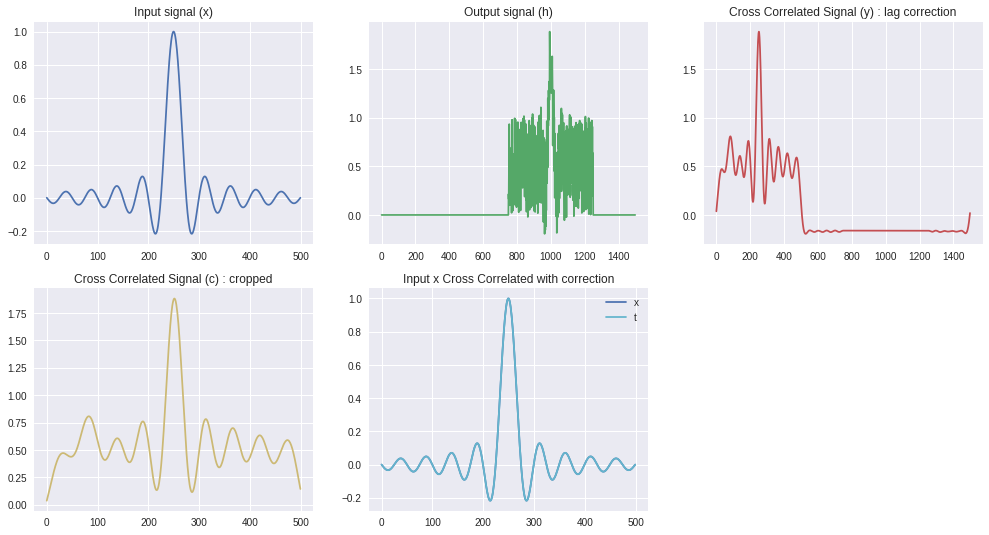

In [36]:
x = np.sinc(np.linspace(-10, 10, 500))

h = x + np.array([np.random.random() for _ in range(len(x))])
delta = np.zeros(1000)
delta[750] = 1 # Proposital added lag! You may change this to see the lag difference
h = np.convolve(h, delta)

corr = np.correlate(h, x, mode='same')
y = normalization2(corr, np.min(h), np.max(h))
lag = np.argmax(y) - np.floor(len(x)/2) # calculate position based on time lag
y = np.roll(y, shift=int(np.ceil(lag))) # shift the correlated signal by lag times
c = y[:len(x)] # cropped till original input signal

print('Lag between Input and Output Signals : ', lag)
print()
print('Correlation between Output Signal (x) and Cross Correlated Signal (c) : ', np.corrcoef(x, c)[0, 1])

t = c + (x - c)
print('Sum diff of x and t : ', np.sum(x) - np.sum(t))
print()


fig = plt.figure(6, figsize=(17, 9))
plt.subplot(231)
plt.title('Input signal (x)')
plt.plot(x, color='C0')
plt.subplot(232)
plt.title('Output signal (h)')
plt.plot(h, color='C1')
plt.subplot(233)
plt.title('Cross Correlated Signal (y) : lag correction')
plt.plot(y, color='C2')
plt.subplot(234)
plt.title('Cross Correlated Signal (c) : cropped')
plt.plot(c, color='C4', label='y')
plt.subplot(235)
plt.title('Input x Cross Correlated with correction')
plt.plot(x, color='C6', label='x')
plt.plot(t, color='C5', label='t')
plt.legend()
plt.show()